## __기상-유동 인구 탐색적 분석__

----------------------------------------------------------------------
### __Intro__
* 본 ipynb 노트북은 생활 인구 데이터와 기상 데이터를 시계열로 구축하여, 상관성을 분석하고, CamelNeon의 백엔드 모듈에서 고려할 인사이트를 발견하고자 합니다.
* 지하철 역 단위로 추정된 생활 인구 데이터는 "./#1 데이터전처리/#1 생활인구 데이터 수집/#2 생활인구 데이터 전처리/지하철역 생활인구 추정 및 구축 과정.ipynb"를 실행시킨 결과를 사용해주시길 바랍니다.
* 기상자료는 기상청 api에서 직접 받아옵니다. 따라서, api 키가 필요하며, 기상청 api허브에서 발급하여 사용해주시길 바랍니다.
  
### __사용 데이터__
* 기상 자료: https://apihub.kma.go.kr/
* 생활 인구 자료

### __목적__
* 생활 인구 데이터(LP)와 기상 데이터 간 탐색적 분석 및 인사이트 발견

### __구조__
* climate_util: 기상 분석을 위한 util 모듈과 api 키 및 인근 관측소 탐색 결과 파일(인근 관측소.csv)가 포함되어있는 폴더입니다.
* {대상 지역}_생활인구수.csv: ./#1 데이터전처리/#1 생활인구 데이터 수집/#2 생활인구 데이터 전처리/지하철역 생활인구 추정 및 구축 과정.ipynb"를 실행시킨 결과물 (예제로 군자역 사용)
* SQL_parameter.json: SQL에 접속하기 위한 정보가 저장되어 있습니다.
* 기상자료_{관측소 번호}.csv: 대상 지역 기준으로 노트북을 최초 실행시킬때 생성됩니다. 이후 재분석시에는 기상청 api가 아닌 로컬에 저장된 데이터를 불어와 분석을 진행합니다.

In [1]:
import koreanize_matplotlib
from climate_util.util_v2 import *

### __기상-유동 인구간 인사이트 분석__
* 기상과 유동인구는 같은 데이터 종 사이에서는 높은 상관성을 보이나, 그 어떠한 연령/성별도 기상에 큰 영향을 받지 않는것으로 나타났습니다.
  * 이를 통해, 기상 현상은 유동인구 변화에 영향을 주지 않는 것으로 판단할 수 있습니다.
  * 코로나 19를 고려하여 2022년 이후 데이터만 재분석 하였을때도 동일한 결과를 나타냅니다.
  * 또한, 다른 대상지역에서도 동일한 결과를 나타냅니다.
* 위 결과를 근거로 기상 자료를 활용한 추가 인사이트 탐색 작업은 수행하지 않기로 하였습니다.

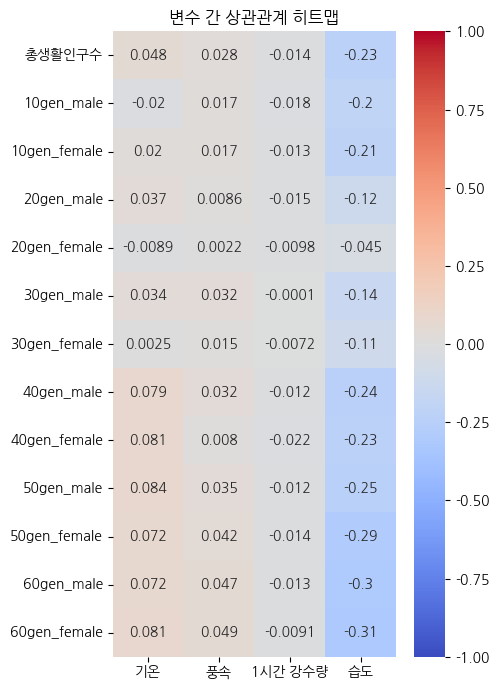

In [3]:
# 아래 코드는 최초 실행 시 기상청 api에 대상기간에 해당하는 데이터를 1시간 단위로 불러오므로, 4~5분 정도 시간이 소요 됩니다.
target = '군자역'
start_year = '2020'
df_total = analyze_population_data(target, start_year, True)

In [4]:
df_total.head()

,지점번호,기온,풍속,1시간 강수량,습도,총생활인구수,10gen_male,10gen_female,20gen_male,20gen_female,30gen_male,30gen_female,40gen_male,40gen_female,50gen_male,50gen_female,60gen_male,60gen_female
Datetime,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,413,-5.3,1.2,0.0,43.6,7837.761451,223.685544,194.791046,721.829496,927.911515,878.896721,829.997035,545.047497,484.382105,459.055821,562.678437,309.927360,484.593297
2020-01-01 01:00:00,413,-4.9,1.0,0.0,43.4,7360.749579,213.396638,190.927691,715.976642,892.604562,848.701147,812.767687,540.304063,440.859284,444.088101,476.322121,297.451458,368.871668
2020-01-01 02:00:00,413,-4.5,1.4,0.0,46.2,7189.577050,200.216907,183.625515,718.456905,872.611784,814.571086,783.744745,521.104725,420.168250,427.454548,475.185511,285.290649,351.723358
2020-01-01 03:00:00,413,-4.7,1.5,0.0,51.9,7101.092526,216.895865,186.260869,691.763254,874.466327,790.647618,783.125640,513.447334,403.372603,425.421985,453.577290,278.956344,360.111826
2020-01-01 04:00:00,413,-4.8,1.7,0.0,57.0,7009.750741,194.391065,197.105007,685.676394,867.638364,789.295734,785.264941,522.256726,399.815951,412.288420,440.754407,266.656000,350.788955
